In [1]:
import numpy as np
import pandas as pd

In [2]:
total_data = pd.read_csv('UCI_Credit_Card.csv')
total_data.rename(columns={"default.payment.next.month":"default"}, inplace= True)
total_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#chaneg the pay type
total_data.iloc[:,6:12] = total_data.iloc[:,6:12].replace(
    [-2,-1,0],
    ['No_Activity','On_Time_Full','Min_Payment'])

In [4]:
#change data type
total_data = total_data.astype({"SEX":'category',
                               "EDUCATION":'category',
                                "MARRIAGE":'category',
                                "PAY_0":'category',
                                "PAY_2":'category',
                                "PAY_3":'category',
                                "PAY_4":'category',
                                "PAY_5":'category',
                                "PAY_6":'category'
                                })

In [5]:
display(total_data.MARRIAGE.value_counts()) # Can't find the reference for marriage = 0, need to remove it
marriage_error = np.where(total_data.MARRIAGE == 0)[0]
total_data = total_data.drop(index= marriage_error)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [8]:
#generate dummy variable
total_data = pd.concat([pd.get_dummies(total_data.iloc[:,:-1]), total_data.default], axis= 1)
total_data

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_Min_Payment,PAY_6_No_Activity,PAY_6_On_Time_Full,default
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,0,0,0,0,0,1,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,0,0,0,0,0,1,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,...,0,0,0,0,0,0,1,0,0,0
29996,29997,150000.0,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,...,0,0,0,0,0,0,1,0,0,0
29997,29998,30000.0,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,...,0,0,0,0,0,0,1,0,0,1
29998,29999,80000.0,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,...,0,0,0,0,0,0,0,0,1,1


In [9]:
#data partition
test_data,train_data, = train_test_split(total_data,
                                        stratify=total_data.default,
                                       test_size= 0.8,
                                       train_size= 0.2)

In [10]:
from sklearn.preprocessing import RobustScaler
scale_temp = train_data.drop(columns= 'default')
Scaler = RobustScaler().fit(scale_temp)
scale_train_dat = pd.DataFrame(Scaler.transform(scale_temp))
scale_train_dat.columns = scale_temp.columns
scale_train_dat.index = scale_temp.index
scale_train_dat = pd.concat([train_data.default, scale_train_dat], axis = 1)

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
sel_temp = scale_train_dat.drop(columns= 'default')
selector = selector.fit(sel_temp)
sel_train = sel_temp.iloc[:,selector.get_support(indices = True)]
scale_sel_enc_train = pd.concat([scale_train_dat.drop(columns = sel_temp.columns),sel_train], axis= 1)
scale_sel_enc_train.head()

,default,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_Min_Payment,PAY_6_No_Activity,PAY_6_On_Time_Full
25393,0,0.689414,-0.315789,-0.692308,0.787309,0.859823,0.936239,0.419618,0.288661,0.327099,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22618,1,0.504660,-0.315789,0.153846,-0.151454,-0.126255,-0.033624,-0.028400,0.023165,0.060938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10581,0,-0.296738,-0.263158,-0.769231,0.984659,1.086179,1.219026,0.140625,0.190598,0.234359,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27441,1,0.825766,0.842105,0.307692,-0.348898,-0.331573,-0.335357,-0.357195,-0.366509,-0.346801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0
1126,0,-0.926232,1.894737,0.076923,0.000547,-0.115192,0.080591,0.045441,-0.087997,-0.120814,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,1.0


In [11]:
scale_temp = test_data.drop(columns= 'default')
scale_test_dat = pd.DataFrame(Scaler.transform(scale_temp))
scale_test_dat.columns = scale_temp.columns
scale_test_dat.index = scale_temp.index
scale_test_dat = pd.concat([test_data.default, scale_test_dat], axis = 1)

sel_temp = scale_test_dat.drop(columns= 'default')
sel_test = sel_temp.iloc[:,selector.get_support(indices = True)]
scale_sel_enc_test = pd.concat([scale_test_dat.drop(columns = sel_temp.columns),sel_test], axis= 1)
scale_sel_enc_test.head()


,default,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_Min_Payment,PAY_6_No_Activity,PAY_6_On_Time_Full
25136,1,0.672304,0.210526,3.153846,-0.348898,-0.344244,-0.348890,-0.364653,-0.374554,-0.354923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
25409,0,0.690479,0.631579,-0.538462,1.363067,1.461077,1.594549,1.689432,0.592174,-0.106048,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2969,0,-0.803529,1.263158,0.692308,2.700811,2.715114,2.993129,2.501396,0.847749,0.916299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0
24713,0,0.644141,1.105263,0.384615,2.450362,2.476218,2.620157,2.949357,3.128303,3.040986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3009,1,-0.800866,-0.578947,-0.692308,0.001656,0.048361,0.058504,0.093387,0.154727,0.167777,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0


In [16]:
#prepare the data for sklearn


x_train = scale_sel_enc_train.drop(columns= 'default')
x_test = scale_sel_enc_test.drop(columns= 'default')
y_test = scale_sel_enc_test.default
y_train = scale_sel_enc_train.default
x_train.shape

(23957, 90)

In [25]:
#the dataset's size is not that small, so we decide not using SMOTE(Oversample). Instead we are trying the undersample method.
temp = scale_sel_enc_train.reset_index().iloc[:,1:]
class_no = np.where(temp.default == 0)[0]
class_yes = np.where(temp.default == 1)[0]

np.random.seed(345)
under_sample_slicer = np.random.choice(class_no, size = sum(temp.default == 1), replace = False)
under_sample_train = pd.concat([temp.loc[class_yes,:],temp.loc[under_sample_slicer,:]], axis= 0)
x_balanced_train = under_sample_train.drop(columns= 'default')
y_balanced_train = under_sample_train.default
x_balanced_train.shape


(10610, 90)

In [19]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [20]:
#preparing the xgboost files
xgb_train = xgb.DMatrix(data = x_train, label= y_train)
xgb_test = xgb.DMatrix(data = x_test)

In [21]:
#initial testing and confusion matrix result, need to make sure the 
xgb_para = {
    'objective' : 'binary:logistic', 
    'eval_metric': ['auc','error'], 
    'eta' : 0.3, 
    'gpu_id' : 0, 
    'tree_method' : 'gpu_hist',
    'seed' : 1

}
xgb_model = xgb.train(params= xgb_para, dtrain=xgb_train, num_boost_round = 3000)
xgb_result = xgb.Booster.predict(xgb_model, xgb_test)
xgb_pred = np.multiply(xgb_result > 0.5, 1)
confusion_matrix(y_test, xgb_pred)

array([[4263,  400],
       [ 857,  469]], dtype=int64)

In [76]:
#XGBoost Tuning Parameter
from itertools import product

def expand_grid(dictionary):
   return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

xgb_para = {
    'objective' : ['binary:logistic'], 
    'eval_metric': ['auc'], 
    'gpu_id' : [0], 
    'tree_method' : ['gpu_hist'],
    'eta' : [0.005,0.03,0.1], 
    'max_depth' : [1,3,5,7],
    'min_child_weight' : [2,,4,6], 
    'gamma' : [0.3,0.5,0.7], 
    'subsample': [0.3,0.5,0.7], 
    'colsample_bytree': [0.3,0.5,0.7]

}
expand_para = expand_grid(xgb_para)
xyz = np.arange(0,expand_para.shape[0],1)


bst_auc = pd.DataFrame(columns= ['auc'],index=[xyz])


In [77]:
#Don't run this chunk of code..., XGBoost Tuning with GPU
#If you want to run this chunck of code, make sure you have a gpu and install xgboost throught pip, otherwise you need to remove 'tree_method' and 'gpu id'
for i in xyz:
    xgb_para = {
    'objective' : 'binary:logistic', 
    'eval_metric': 'auc',
    'gpu_id' : 0, 
    'tree_method' : 'gpu_hist',
    'eta' : expand_para.iloc[i,4], 
    'max_depth' : expand_para.iloc[i,5], 
    'min_child_weight' : expand_para.iloc[i,6],
    'gamma' : expand_para.iloc[i,7], 
    'subsample': expand_para.iloc[i,8], 
    'colsample_bytree':expand_para.iloc[i,9],
    'seed' : 1
    }
    gs_result = xgb.cv(params= xgb_para, 
    dtrain=xgb_train, 
    num_boost_round = 3000, 
    early_stopping_rounds= 100, 
    verbose_eval= 0,
    nfold= 5
    
    )
    bst_auc.auc[i] = gs_result['test-auc-mean'].max()
#we are not going to tuning a new parameter for xgboost since it works very well with imbalanced data.

In [78]:
tuning_result = pd.concat([expand_para.reset_index(drop=True),bst_auc.reset_index(drop=True)],axis=1)
tuning_result.sort_values(by = 'auc', ascending = False)


,objective,eval_metric,gpu_id,tree_method,eta,max_depth,min_child_weight,gamma,subsample,colsample_bytree,auc
5,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.3,0.5,0.7,0.788587
23,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.7,0.5,0.7,0.788559
14,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.5,0.5,0.7,0.788541
25,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.7,0.7,0.5,0.788407
26,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.7,0.7,0.7,0.788356
17,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.5,0.7,0.7,0.788347
16,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.5,0.7,0.5,0.788321
8,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.3,0.7,0.7,0.788314
7,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.3,0.7,0.5,0.788294
13,binary:logistic,auc,0,gpu_hist,0.005,5,8,0.5,0.5,0.5,0.788292


In [23]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [26]:
#After we collected the best parameter for XGboost, we are going to run the sklearn GridSearchCV to test other models.
#Don't run this chunk of code unless you want to wait 30 mins
positive_label = 1
scoring_metric = 'roc_auc'
classifier = [
              LogisticRegression(solver= 'liblinear', random_state= 1),
              DecisionTreeClassifier(random_state = 1),
              RandomForestClassifier(random_state = 1)
              ]
name = ["Logistic_Regression", "Decision_Tree", "Random_Forest"]

ml_para = [{'penalty' : [ 'l2', 'l1']},
           {'criterion' : ['gini', 'entropy'], 'max_depth' : [1,3,5,7]},  
           {'criterion' : ['gini', 'entropy'], 'max_depth' : [1,3,5,7], 'max_features': [None, 'sqrt', 'log2'], 
           'n_estimators': [50, 300, 1000]}]


for i,ml_model in enumerate(classifier): 
    print('working on ' + name[i])
    grid_search = GridSearchCV(
        estimator= ml_model,
        param_grid= ml_para[i],
        cv = 5,
        scoring= scoring_metric,
        n_jobs= 6
    )

    model_fit = grid_search.fit(x_train, y_train)
    print(model_fit.best_params_) # relative the best parameter for imbalanced model
    model_balanced_fit = grid_search.fit(x_balanced_train, y_balanced_train)
    print(model_balanced_fit.best_params_) # relative the best parameter for balanced model


working on Logistic_Regression
{'penalty': 'l1'}
{'penalty': 'l1'}
working on Decision_Tree
{'criterion': 'gini', 'max_depth': 7}
{'criterion': 'gini', 'max_depth': 5}
working on Random_Forest
{'criterion': 'entropy', 'max_depth': 7, 'max_features': None, 'n_estimators': 1000}
{'criterion': 'gini', 'max_depth': 7, 'max_features': None, 'n_estimators': 1000}
working on XGBoost


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:02:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 1600, 'subsample': 0.5}


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:03:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.005, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 1600, 'subsample': 0.5}


In [61]:
#For the group project, this is the only chunck of code you sould run for machine learning modeling section
positive_label = 1
scoring_metric = 'roc_auc'
classifier = [
              LogisticRegression(solver= 'liblinear', random_state= 1),
              DecisionTreeClassifier(random_state = 1),
              RandomForestClassifier(random_state = 1),
              XGBClassifier(random_state = 1)
              ]
name = ["Logistic_Regression", "Decision_Tree", "Random_Forest", "XGBoost"]
balanced_name = ['Logistic_Regression_Balanced', 'Decision_Tree Balanced', 'Random_Forest_Balanced', 'xgboost_Balanced']
ml_para = [{'penalty': ['l1']},
           {'criterion': ['gini'], 'max_depth': [7]},  
           {'criterion': ['entropy'], 'max_depth': [7], 'max_features': [None], 'n_estimators': [1000]},
           {'learning_rate' : [0.005], 
           'n_estimators': [1600],
           'max_depth' : [5],
           'min_child_weight' : [6], 
           'gamma' : [0.1], 
           'subsample': [0.5], 
           'colsample_bytree': [0.5]}
           ]

models = []
preds = []
probs = []
BAs = []
AUCs = []
timings = []

#imblanced data
for i,ml_model in enumerate(classifier): 
    print('working on ' + name[i])
    grid_search = GridSearchCV(
        estimator= ml_model,
        param_grid= ml_para[i],
        cv = 5,
        scoring= scoring_metric,
        n_jobs= 6
    )

    model_fit = grid_search.fit(x_train, y_train)
    pred = grid_search.predict(x_test)
    prob = grid_search.predict_proba(x_test)[:, 1]

    models.append(model_fit)
    preds.append(pred)
    probs.append(prob)
    

    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    timings.append(model_fit.refit_time_)
print('its over amigo')

#balanced data:

ml_para = [{'penalty': ['l1']},
           {'criterion': ['gini'], 'max_depth': [5]},  
           {'criterion': ['gini'], 'max_depth': [7], 'max_features': [None], 'n_estimators': [1000]},
           {'learning_rate' : [0.005], 
           'n_estimators': [1600],
           'max_depth' : [5],
           'min_child_weight' : [6], 
           'gamma' : [0.1], 
           'subsample': [0.5], 
           'colsample_bytree': [0.5]}]


for i,ml_model in enumerate(classifier): 
    print('working on ' + balanced_name[i])
    grid_search = GridSearchCV(
        estimator= ml_model,
        param_grid= ml_para[i],
        cv = 5,
        scoring= scoring_metric,
        n_jobs= 6
    )

    model_fit = grid_search.fit(x_balanced_train, y_balanced_train)
    pred = grid_search.predict(x_test)
    prob = grid_search.predict_proba(x_test)[:, 1]

    models.append(model_fit)
    preds.append(pred)
    probs.append(prob)
    

    BAs.append(balanced_accuracy_score(y_test, pred))
    AUCs.append(roc_auc_score(y_test, prob))
    
    timings.append(model_fit.refit_time_)
print('its over amigo')



working on Logistic_Regression
working on Decision_Tree
working on Random_Forest
working on XGBoost


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:06:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
its over amigo
working on Logistic_Regression_Balanced
working on Decision_Tree Balanced
working on Random_Forest_Balanced
working on xgboost_Balanced


C:\Users\TF2020\miniconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:08:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
its over amigo


In [62]:
name = ["Logistic_Regression", "Decision_Tree", "Random_Forest", "XGBoost"]
balanced_name = ['Logistic_Regression_Balanced', 'Decision_Tree Balanced', 'Random_Forest_Balanced', 'xgboost_Balanced']
name = name + balanced_name

In [63]:
Tuning_results = pd.DataFrame({'Classifier': name, 
                        'Balanced Accuracy': BAs, 
                        'AUC': AUCs,
                        'Refit Time': timings}).sort_values(['AUC', 'Balanced Accuracy'], ascending = False)

In [64]:
Tuning_results

,Classifier,Balanced Accuracy,AUC,Refit Time
7,xgboost_Balanced,0.704088,0.771690,7.060759
3,XGBoost,0.645672,0.771538,14.555884
2,Random_Forest,0.637794,0.763447,180.936287
6,Random_Forest_Balanced,0.692667,0.761879,56.361232
4,Logistic_Regression_Balanced,0.700584,0.760126,0.271338
0,Logistic_Regression,0.646695,0.757137,1.485815
5,Decision_Tree Balanced,0.677676,0.729630,0.068809
1,Decision_Tree,0.640385,0.728463,0.221350


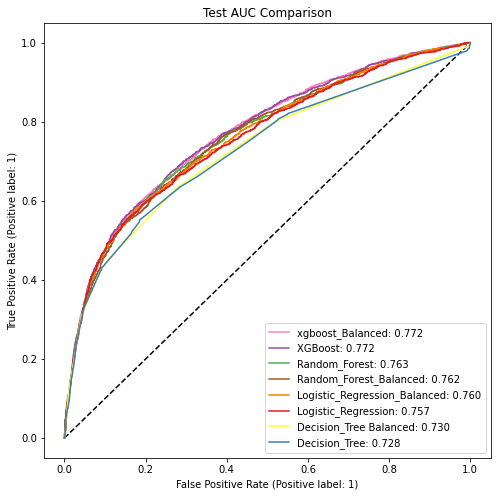

In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, f1_score, accuracy_score
def Custom_ROC_Plot (results, X_test, y_test, title, figwidth = 8, figheight = 8):

    fig, ax = plt.subplots(figsize = (figwidth, figheight))

    ax.plot(ax.get_xlim(), ax.get_ylim(), ls = '--', c = 'k')
    ax.set(title = title)

    for i in results.index:
        RocCurveDisplay.from_estimator(models[i], 
                                       x_test, 
                                       y_test, 
                                       color = cm.Set1(i), 
                                       label = results.loc[i, 'Classifier'] + ': {:.3f}'.format(results.loc[i, 'AUC']), 
                                       ax = ax)
        
    return([fig, ax])

fig, ax = Custom_ROC_Plot(Tuning_results, x_test, y_test, title = 'Test AUC Comparison')

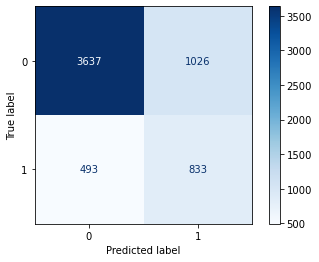

In [66]:
best_index = Tuning_results.index[0]
ConfusionMatrixDisplay.from_estimator(models[best_index], 
                                      x_test, 
                                      y_test,
                                      cmap = plt.cm.Blues,
                                      values_format = 'd')

<AxesSubplot:xlabel='importance', ylabel='feature'>

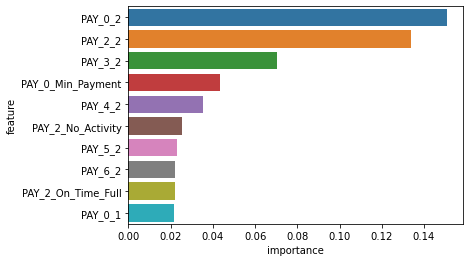

In [67]:
# for models with feature importances
if hasattr(models[best_index].best_estimator_, 'feature_importances_'):
    var_imp = pd.DataFrame({
        'feature': x_test.columns, 
        'importance': models[best_index].best_estimator_.feature_importances_}).sort_values('importance', ascending = False)

elif hasattr(models[best_index].best_estimator_, 'coef_'):
    var_imp = pd.DataFrame({
        'feature': x_test.columns, 
        'importance_abs': abs(models[best_index].best_estimator_.coef_[0]), 
        'importance': models[best_index].best_estimator_.coef_[0]}).sort_values('importance_abs', ascending = False)
    
sns.barplot(y = 'feature', 
            x = 'importance', 
            data = var_imp.head(10))